In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import pandas as pd

import cartopy
import cartopy.crs as ccrs
import matplotlib
%matplotlib inline
from netCDF4 import Dataset


import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.colors as colors
from sklearn import datasets
from iris.coords import DimCoord
from iris.cube import Cube
import iris.analysis
import numpy.ma as ma

import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point


#from iris.experimental.regrid import regrid_weighted_curvilinear_to_rectilinear

import matplotlib.cm as mpl_cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.pyplot import xcorr


from scipy.interpolate import splrep, splev
from scipy.stats import pearsonr
from scipy import signal 

import math
from matplotlib import mlab

import regionmask
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
filename_3='CESM2_midHolocene.cvdp_data.1-700.nc'
cesm=xr.open_dataset(filename_3,decode_times=False)

filename_5='EC-Earth3-LR_midHolocene.cvdp_data.2245-2445.nc'
ec=xr.open_dataset(filename_5,decode_times=False)

filename_9='FGOALS-f3-L_midHolocene.cvdp_data.1020-1219.nc'
fgoalsf3=xr.open_dataset(filename_9,decode_times=False)

filename_13='HadGEM3-GC31-LL_midHolocene.cvdp_data.2250-2349.nc'
hadgem=xr.open_dataset(filename_13,decode_times=False)

filename_17='IPSL-CM6A-LR_midHolocene.cvdp_data.1850-2399.nc'
ipsl=xr.open_dataset(filename_17,decode_times=False)

In [2]:
#load mh & pi data

filename_3='CESM2_midHolocene.cvdp_data.1-700.nc'
cesm=xr.open_dataset(filename_3,decode_times=False)

filename_4='CESM2_piControl.cvdp_data.701-1200.nc'
pi_cesm=xr.open_dataset(filename_4,decode_times=False)

filename_5='EC-Earth3-LR_midHolocene.cvdp_data.2245-2445.nc'
ec=xr.open_dataset(filename_5,decode_times=False)

filename_6='EC-Earth3-LR_piControl.cvdp_data.2219-2419.nc'
pi_ec=xr.open_dataset(filename_6,decode_times=False)

filename_9='FGOALS-f3-L_midHolocene.cvdp_data.1020-1219.nc'
fgoalsf3=xr.open_dataset(filename_9,decode_times=False)

filename_10='FGOALS-f3-L_piCtl-substitute.cvdp_data.1850-1899.nc'
pi_fgoalsf3=xr.open_dataset(filename_10,decode_times=False)

# need to add fgoals-g3

filename_31='FGOALS-g3_midHolocene.cvdp_data.627-1126.nc'
fgoalsg3=xr.open_dataset(filename_31,decode_times=False)

filename_32='FGOALS-g3_piControl.cvdp_data.200-699-2.nc'
pi_fgoalsg3=xr.open_dataset(filename_32,decode_times=False)


filename_11='GISS-E2-1-G_midHolocene.cvdp_data.2900-2999.nc'
giss=xr.open_dataset(filename_11,decode_times=False)

filename_12='GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc'
pi_giss=xr.open_dataset(filename_12,decode_times=False)

filename_13='HadGEM3-GC31-LL_midHolocene.cvdp_data.2250-2349.nc'
hadgem=xr.open_dataset(filename_13,decode_times=False)

filename_14='HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc'
pi_hadgem=xr.open_dataset(filename_14,decode_times=False)

filename_17='IPSL-CM6A-LR_midHolocene.cvdp_data.1850-2399.nc'
ipsl=xr.open_dataset(filename_17,decode_times=False)

filename_18='IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc'
pi_ipsl=xr.open_dataset(filename_18,decode_times=False)

filename_29='NorESM2-LM_midHolocene.cvdp_data.2101-2200.nc'
noresm2=xr.open_dataset(filename_29,decode_times=False)

filename_30='NorESM2-LM_piControl.cvdp_data.1710-2100.nc'
pi_noresm2=xr.open_dataset(filename_30,decode_times=False)



In [7]:
filename_34='CESM2_lig127k.cvdp_data.1-700.nc'
lig_cesm=xr.open_dataset(filename_34,decode_times=False)

filename_35='EC-Earth3-LR_lig127k.cvdp_data.2240-2449.nc'
lig_ec=xr.open_dataset(filename_35,decode_times=False)

filename_31='FGOALS-f3-L_lig127k.cvdp_data.700-1199.nc'
lig_fgoalsf3=xr.open_dataset(filename_31,decode_times=False)

filename_36='FGOALS-g3_lig127k.cvdp_data.750-1249-2.nc'
lig_fgoalsg3=xr.open_dataset(filename_36,decode_times=False)

filename_32='GISS-E2-1-G_lig127k.cvdp_data.2900-2999.nc'
lig_giss=xr.open_dataset(filename_32,decode_times=False)

filename_37='HadGEM3-GC31-LL_lig127k.cvdp_data.1950-2049.nc'
lig_hadgem=xr.open_dataset(filename_37,decode_times=False)

filename_33='IPSL-CM6A-LR_lig127k.cvdp_data.1850-2399.nc'
lig_ipsl=xr.open_dataset(filename_33,decode_times=False)

filename_38='NorESM2-LM_lig127k.cvdp_data.2101-2200-2.nc'
lig_noresm2=xr.open_dataset(filename_38,decode_times=False)

### Profile of AMOC at 30N for PI, MH, LIG runs

In [2]:
#load mh & pi data

filename_3='CESM2_midHolocene.cvdp_data.1-700.nc'
cesm=xr.open_dataset(filename_3,decode_times=False)

filename_4='CESM2_piControl.cvdp_data.701-1200.nc'
pi_cesm=xr.open_dataset(filename_4,decode_times=False)

filename_5='EC-Earth3-LR_midHolocene.cvdp_data.2245-2445.nc'
ec=xr.open_dataset(filename_5,decode_times=False)

filename_6='EC-Earth3-LR_piControl.cvdp_data.2219-2419.nc'
pi_ec=xr.open_dataset(filename_6,decode_times=False)

filename_9='FGOALS-f3-L_midHolocene.cvdp_data.1020-1219.nc'
fgoalsf3=xr.open_dataset(filename_9,decode_times=False)

filename_10='FGOALS-f3-L_piCtl-substitute.cvdp_data.1850-1899.nc'
pi_fgoalsf3=xr.open_dataset(filename_10,decode_times=False)

# need to add fgoals-g3 
filename_11='GISS-E2-1-G_midHolocene.cvdp_data.2900-2999.nc'
giss=xr.open_dataset(filename_11,decode_times=False)

filename_12='GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc'
pi_giss=xr.open_dataset(filename_12,decode_times=False)

filename_13='HadGEM3-GC31-LL_midHolocene.cvdp_data.2250-2349.nc'
hadgem=xr.open_dataset(filename_13,decode_times=False)

filename_14='HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc'
pi_hadgem=xr.open_dataset(filename_14,decode_times=False)

filename_17='IPSL-CM6A-LR_midHolocene.cvdp_data.1850-2399.nc'
ipsl=xr.open_dataset(filename_17,decode_times=False)

filename_18='IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc'
pi_ipsl=xr.open_dataset(filename_18,decode_times=False)

filename_29='NorESM2-LM_midHolocene.cvdp_data.2101-2200.nc'
noresm2=xr.open_dataset(filename_29,decode_times=False)

filename_30='NorESM2-LM_piControl.cvdp_data.1710-2100.nc'
pi_noresm2=xr.open_dataset(filename_30,decode_times=False)


In [3]:
cesm_amoc_30_1=cesm.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
cesm_amoc_30=cesm_amoc_30_1.values ## data used for plotting x-axis
cesm_lev=cesm_amoc_30_1.lev.values  ## data for plotting y-axis
pi_cesm_amoc_30_1=pi_cesm.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
pi_cesm_amoc_30=pi_cesm_amoc_30_1.values
pi_cesm_lev=pi_cesm_amoc_30_1.lev.values

ec_amoc_30_1=ec.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
ec_amoc_30=ec_amoc_30_1.values
ec_lev=ec_amoc_30_1.lev.values
pi_ec_amoc_30_1=pi_ec.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
pi_ec_amoc_30=pi_ec_amoc_30_1.values
pi_ec_lev=pi_ec_amoc_30_1.lev.values

fgoalsf3_amoc_30_1=fgoalsf3.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
fgoalsf3_amoc_30=fgoalsf3_amoc_30_1.values
fgoalsf3_lev=fgoalsf3_amoc_30_1.lev.values
pi_fgoalsf3_amoc_30_1=pi_fgoalsf3.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
pi_fgoalsf3_amoc_30=pi_fgoalsf3_amoc_30_1.values
pi_fgoalsf3_lev=pi_fgoalsf3_amoc_30_1.lev.values

giss_amoc_30_1=giss.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
giss_amoc_30=giss_amoc_30_1.values
giss_lev=giss_amoc_30_1.lev.values
pi_giss_amoc_30_1=pi_giss.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
pi_giss_amoc_30=pi_giss_amoc_30_1.values
pi_giss_lev=pi_giss_amoc_30_1.lev.values

hadgem_amoc_30_1=hadgem.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
hadgem_amoc_30=hadgem_amoc_30_1.values
hadgem_lev=hadgem_amoc_30_1.lev.values
pi_hadgem_amoc_30_1=pi_hadgem.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
pi_hadgem_amoc_30=pi_hadgem_amoc_30_1.values
pi_hadgem_lev=pi_hadgem_amoc_30_1.lev.values

ipsl_amoc_30_1=ipsl.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
ipsl_amoc_30=ipsl_amoc_30_1.values
ipsl_lev=ipsl_amoc_30_1.lev.values
pi_ipsl_amoc_30_1=pi_ipsl.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
pi_ipsl_amoc_30=pi_ipsl_amoc_30_1.values
pi_ipsl_lev=pi_ipsl_amoc_30_1.lev.values

noresm2_amoc_30_1=noresm2.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
noresm2_amoc_30=noresm2_amoc_30_1.values
noresm2_lev=noresm2_amoc_30_1.lev.values
pi_noresm2_amoc_30_1=pi_noresm2.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
pi_noresm2_amoc_30=pi_noresm2_amoc_30_1.values
pi_noresm2_lev=pi_noresm2_amoc_30_1.lev.values

In [4]:
# add fgoals-g3
filename_36='../../../Desktop/esgf_data_folder/streamfunction/mh_fgoalsg3_combined.nc'
fgoalsg3_1=xr.open_dataset(filename_36)
fgoalsg3_2=fgoalsg3_1.sel(basin=0)
fgoalsg3_3=fgoalsg3_2.msftmz
fgoalsg3_4=fgoalsg3_3*1e-9

fgoalsg3_amoc_30_1=fgoalsg3_4.groupby("time.year").mean(dim='time')
fgoalsg3_amoc_30_2=fgoalsg3_amoc_30_1.mean(dim='year') # do the year averages 
fgoalsg3_amoc_30_3=fgoalsg3_amoc_30_2.sel(lat=30,method='nearest')

fgoalsg3_amoc_30=fgoalsg3_amoc_30_3.values
fgoalsg3_lev=fgoalsg3_amoc_30_3.lev.values

In [5]:
filename_36='../../../Desktop/esgf_data_folder/streamfunction/pi_fgoalsg3_combined.nc'
pi_fgoalsg3_1=xr.open_dataset(filename_36)
pi_fgoalsg3_2=pi_fgoalsg3_1.sel(basin=0)
pi_fgoalsg3_3=pi_fgoalsg3_2.msftmz
pi_fgoalsg3_4=pi_fgoalsg3_3*1e-9

pi_fgoalsg3_amoc_30_1=pi_fgoalsg3_4.groupby("time.year").mean(dim='time')
pi_fgoalsg3_amoc_30_2=pi_fgoalsg3_amoc_30_1.mean(dim='year') # do the year averages 
pi_fgoalsg3_amoc_30_3=pi_fgoalsg3_amoc_30_2.sel(lat=30,method='nearest')

pi_fgoalsg3_amoc_30=pi_fgoalsg3_amoc_30_3.values
pi_fgoalsg3_lev=pi_fgoalsg3_amoc_30_3.lev.values


In [6]:
# load lig data--Capitalised 

filename_34='CESM2_lig127k.cvdp_data.1-700.nc'
CESM=xr.open_dataset(filename_34,decode_times=False)

filename_31='FGOALS-f3-L_lig127k.cvdp_data.700-1199.nc'
FGOALSF3=xr.open_dataset(filename_31,decode_times=False)

filename_32='GISS-E2-1-G_lig127k.cvdp_data.2900-2999.nc'
GISS=xr.open_dataset(filename_32,decode_times=False)

filename_33='IPSL-CM6A-LR_lig127k.cvdp_data.1850-2399.nc'
IPSL=xr.open_dataset(filename_33,decode_times=False)

In [7]:
CESM_amoc_30_1=CESM.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
CESM_amoc_30=CESM_amoc_30_1.values ## data used for plotting x-axis
CESM_lev=CESM_amoc_30_1.lev.values  ## data for plotting y-axis

FGOALSF3_amoc_30_1=FGOALSF3.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
FGOALSF3_amoc_30=FGOALSF3_amoc_30_1.values 
FGOALSF3_lev=FGOALSF3_amoc_30_1.lev.values  

GISS_amoc_30_1=GISS.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
GISS_amoc_30=GISS_amoc_30_1.values 
GISS_lev=GISS_amoc_30_1.lev.values  

IPSL_amoc_30_1=IPSL.amoc_mean_ann.sel(lat_amoc=30,method='nearest')
IPSL_amoc_30=IPSL_amoc_30_1.values 
IPSL_lev=IPSL_amoc_30_1.lev.values  

In [8]:
filename_31='../../../Desktop/esgf_data_folder/streamfunction/lig_ec_earth_combined.nc'
EC_1=xr.open_dataset(filename_31)
EC_2=EC_1.sel(basin=1)
EC_3=EC_2.msftyz
EC_4=EC_3*1e-9

EC_amoc_30_1=EC_4.groupby("time.year").mean(dim='time')
EC_amoc_30_2=EC_amoc_30_1.mean(dim='year') # do the year averages 
EC_amoc_30_3=EC_amoc_30_2.sel(rlat=30,method='nearest')

EC_amoc_30=EC_amoc_30_3.values
EC_lev=EC_amoc_30_3.lev.values


filename_30='../../../Desktop/esgf_data_folder/streamfunction/lig_fgoalsg3_combined.nc'
FGOALSG3_1=xr.open_dataset(filename_30)
FGOALSG3_2=FGOALSG3_1.sel(basin=0)
FGOALSG3_3=FGOALSG3_2.msftmz
FGOALSG3_4=FGOALSG3_3*1e-9

FGOALSG3_amoc_30_1=FGOALSG3_4.groupby("time.year").mean(dim='time')
FGOALSG3_amoc_30_2=FGOALSG3_amoc_30_1.mean(dim='year') # do the year averages 
FGOALSG3_amoc_30_3=FGOALSG3_amoc_30_2.sel(lat=30,method='nearest')

FGOALSG3_amoc_30=FGOALSG3_amoc_30_3.values
FGOALSG3_lev=FGOALSG3_amoc_30_3.lev.values


filename_53='../../../Desktop/esgf_data_folder/streamfunction/lig_hadgem_combined.nc'
HADGEM_1=xr.open_dataset(filename_53)
HADGEM_2=HADGEM_1.sel(basin=0)
HADGEM_3=HADGEM_2.msftyz
HADGEM_4=HADGEM_3*1e-9

HADGEM_amoc_30_1=HADGEM_4.groupby("time.year").mean(dim='time')
HADGEM_amoc_30_2=HADGEM_amoc_30_1.mean(dim='year') # do the year averages 
HADGEM_amoc_30_3=HADGEM_amoc_30_2.sel(rlat=30,method='nearest')

HADGEM_amoc_30=HADGEM_amoc_30_3.values
HADGEM_lev=HADGEM_amoc_30_3.lev.values


filename_33='../../../Desktop/esgf_data_folder/streamfunction/lig_noresm2_combined.nc'
NORESM2_1=xr.open_dataset(filename_33)
NORESM2_2=NORESM2_1.sel(basin=0)
NORESM2_3=NORESM2_2.msftmz
NORESM2_4=NORESM2_3*1e-9

NORESM2_amoc_30_1=NORESM2_4.groupby("time.year").mean(dim='time')
NORESM2_amoc_30_2=NORESM2_amoc_30_1.mean(dim='year') # do the year averages 
NORESM2_amoc_30_3=NORESM2_amoc_30_2.sel(lat=30,method='nearest')

NORESM2_amoc_30=NORESM2_amoc_30_3.values
NORESM2_lev=NORESM2_amoc_30_3.lev.values


In [9]:
# plotting -- define x-axis and y-axis data

pi_xaxis=[pi_cesm_amoc_30, pi_ec_amoc_30, pi_fgoalsf3_amoc_30, pi_fgoalsg3_amoc_30, 
          pi_giss_amoc_30, pi_hadgem_amoc_30, pi_ipsl_amoc_30, pi_noresm2_amoc_30]

mh_xaxis=[cesm_amoc_30, ec_amoc_30, fgoalsf3_amoc_30, fgoalsg3_amoc_30, 
          giss_amoc_30, hadgem_amoc_30, ipsl_amoc_30, noresm2_amoc_30]

lig_xaxis=[CESM_amoc_30, EC_amoc_30, FGOALSF3_amoc_30, FGOALSG3_amoc_30,
          GISS_amoc_30, HADGEM_amoc_30, IPSL_amoc_30, NORESM2_amoc_30]


pi_yaxis=[pi_cesm_lev, pi_ec_lev, pi_fgoalsf3_lev, pi_fgoalsg3_lev, 
          pi_giss_lev, pi_hadgem_lev, pi_ipsl_lev, pi_noresm2_lev]

mh_yaxis=[cesm_lev, ec_lev, fgoalsf3_lev, fgoalsg3_lev, 
          giss_lev, hadgem_lev, ipsl_lev, noresm2_lev]

lig_yaxis=[CESM_lev, EC_lev, FGOALSF3_lev, FGOALSG3_lev,
          GISS_lev, HADGEM_lev, IPSL_lev, NORESM2_lev]

In [10]:
model_name=['CESM2','EC-Earth3-LR', 'FGOALS-f3-L', 'FGOALS-g3', 
            'GISS-E2-1-G','HadGEM3-GC31-LL','IPSL-CM6A-LR','NorESM2-LM']

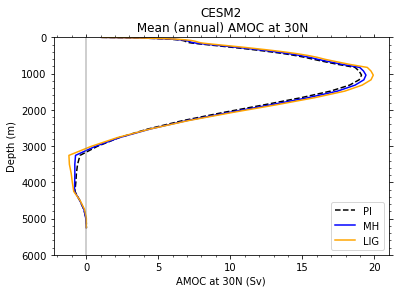

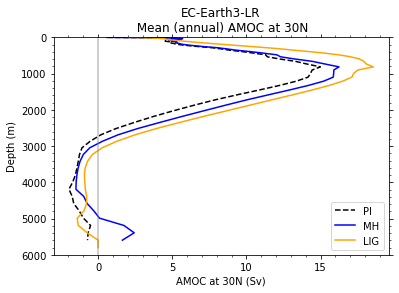

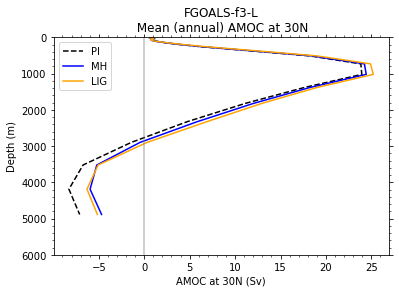

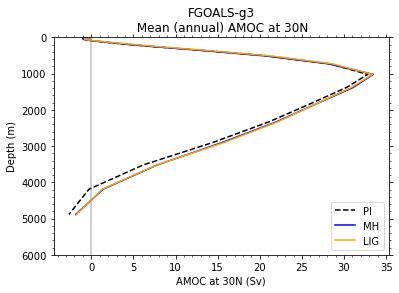

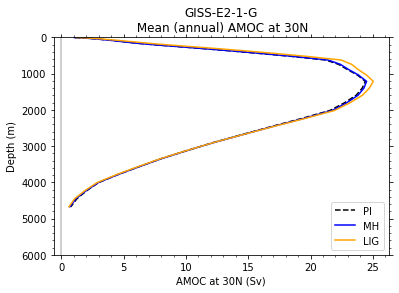

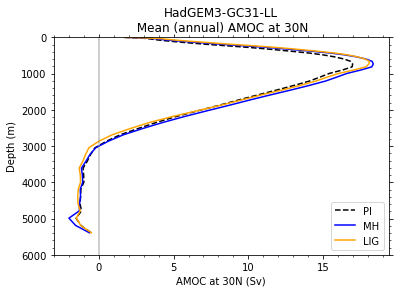

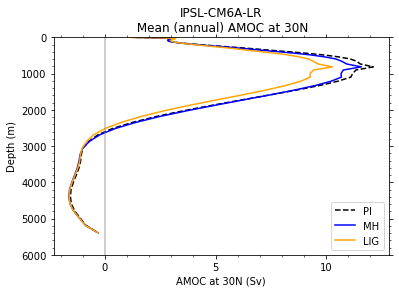

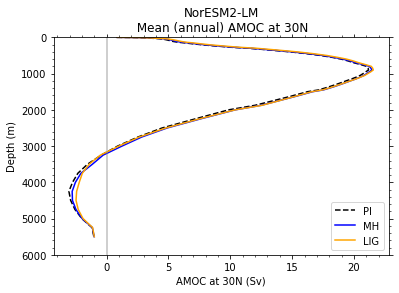

In [12]:
# plotting -- profile of mean annual AMOC at 30N for different experiments 

for i in range (0,8):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.plot(pi_xaxis[i],pi_yaxis[i],color='black',label='PI',ls='--') #pi
    ax.plot(mh_xaxis[i],mh_yaxis[i],color='blue', label='MH') #mh
    ax.plot(lig_xaxis[i],lig_yaxis[i],color='orange', label='LIG') #lig
    
    ax.set(ylim=[6000,0])
    ax.axvline(0.0,color='gray',alpha=0.5)
    ax.xaxis.set_major_locator(mticker.MultipleLocator(5.))
    ax.xaxis.set_minor_locator(mticker.MultipleLocator(1.))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(1000.))
    ax.yaxis.set_minor_locator(mticker.MultipleLocator(200.))
    ax.tick_params(which='both', direction='out', top=True, right=True)
    ax.set(title='%s\n Mean (annual) AMOC at 30N' %(model_name[i]), ylabel='Depth (m)', xlabel='AMOC at 30N (Sv)')
    ax.legend(loc='best')